# A simple Predator-Prey Model
See [Lotka–Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) for details.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from stockflow import *

### Parameters

In [2]:
predator_birth_rate = 0.3
prey_birth_rate = 0.4
predator_death_rate = 0.5
prey_death_rate = 0.6

### Model setup

In [3]:
m = Model()

In [4]:
predator = m.stock("Predator")
prey = m.stock("Prey")

In [5]:
m.flow("Predator Birth", None, predator, predator_birth_rate * predator * prey)
m.flow("Prey Bith", None, prey, prey_birth_rate * prey)
m.flow("Predator Death", predator, None, predator_death_rate * predator)
m.flow("Prey Death", prey, None, prey_death_rate * predator * prey)

Flow('Prey Death', Stock('Prey'), None, Product(Constant(0.6), Stock('Predator'), Stock('Prey')))

### Simulation

In [6]:
t = np.linspace(0, 50, 500)
y = odeint(m.ode_func, np.array([1, 1]), t)

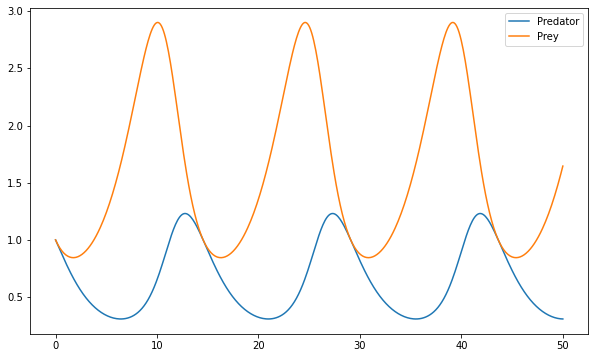

In [7]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.legend([s.label for s in m.stocks], loc="upper right");